# Part 1: Exploratory Data Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset
Please see the link to know more about the dataset: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

Feture elaboration:

- age - age
- bp - blood pressure
- sg - specific gravity
- al - albumin
- su - sugar
- rbc - red blood cells
- pc - pus cell
- pcc - pus cell clumps
- ba - bacteria
- bgr - blood glucose random
- bu - blood urea
- sc - serum creatinine
- sod - sodium
- pot - potassium
- hemo - hemoglobin
- pcv - packed cell volume
- wc - white blood cell count
- rc - red blood cell count
- htn - hypertension
- dm - diabetes mellitus
- cad - coronary artery disease
- appet - appetite
- pe - pedal edema
- ane - anemia
- class - class

In [2]:
df = pd.read_csv('kidney_disease.csv')
df.drop('id', axis = 1, inplace = True)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
## Cleaning dirty data: Categorical Data

rbc_map = {'normal':0, 'abnormal':1}
df['rbc'] = df.rbc.map(rbc_map)

pc_map = {'normal':0, 'abnormal':1}
df['pc'] = df.pc.map(pc_map)

pcc_map = {'notpresent':0, 'present':1}
df['pcc'] = df.pcc.map(pcc_map)

ba_map = {'notpresent':0, 'present':1}
df['ba'] = df.ba.map(ba_map)

htn_map = {'no':0, 'yes':1}
df['htn'] = df.htn.map(htn_map)

dm_map = {'no':0, '\tno': 0, 'yes':1, '\tyes': 1, ' yes': 1}
df['dm'] = df.dm.map(dm_map)

cad_map = {'no':0, '\tno': 0, 'yes':1}
df['cad'] = df.cad.map(cad_map)

appet_map = {'poor':0, 'good':1}
df['appet'] = df.appet.map(appet_map)

pe_map = {'no':0, 'yes':1}
df['pe'] = df.pe.map(pe_map)

ane_map = {'no':0, 'yes':1}
df['ane'] = df.ane.map(ane_map)

classification_map = {'notckd':0, 'ckd':1, 'ckd\t': 1}
df['classification'] = df.classification.map(classification_map)

## Cleaning dirty data: Numerical Data

df.pcv = df.pcv.replace('\t?', np.nan)
df.pcv = df.pcv.replace('\t43', 43)
df.pcv = pd.to_numeric(df.pcv, errors='coerce')

df.wc = df.wc.replace('\t?', np.nan)
df.wc = df.wc.replace('\t6200', 6200)
df.wc = df.wc.replace('\t8400', 8400)
df.wc = pd.to_numeric(df.wc, errors='coerce')

df.rc = df.rc.replace('\t?', np.nan)
df.rc = pd.to_numeric(df.rc, errors='coerce')

In [4]:
## Renaming the columns

col_name={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

df.rename(columns=col_name, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    float64
 6   pus_cell                 335 non-null    float64
 7   pus_cell_clumps          396 non-null    float64
 8   bacteria                 396 non-null    float64
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

#### What about Missing Values?

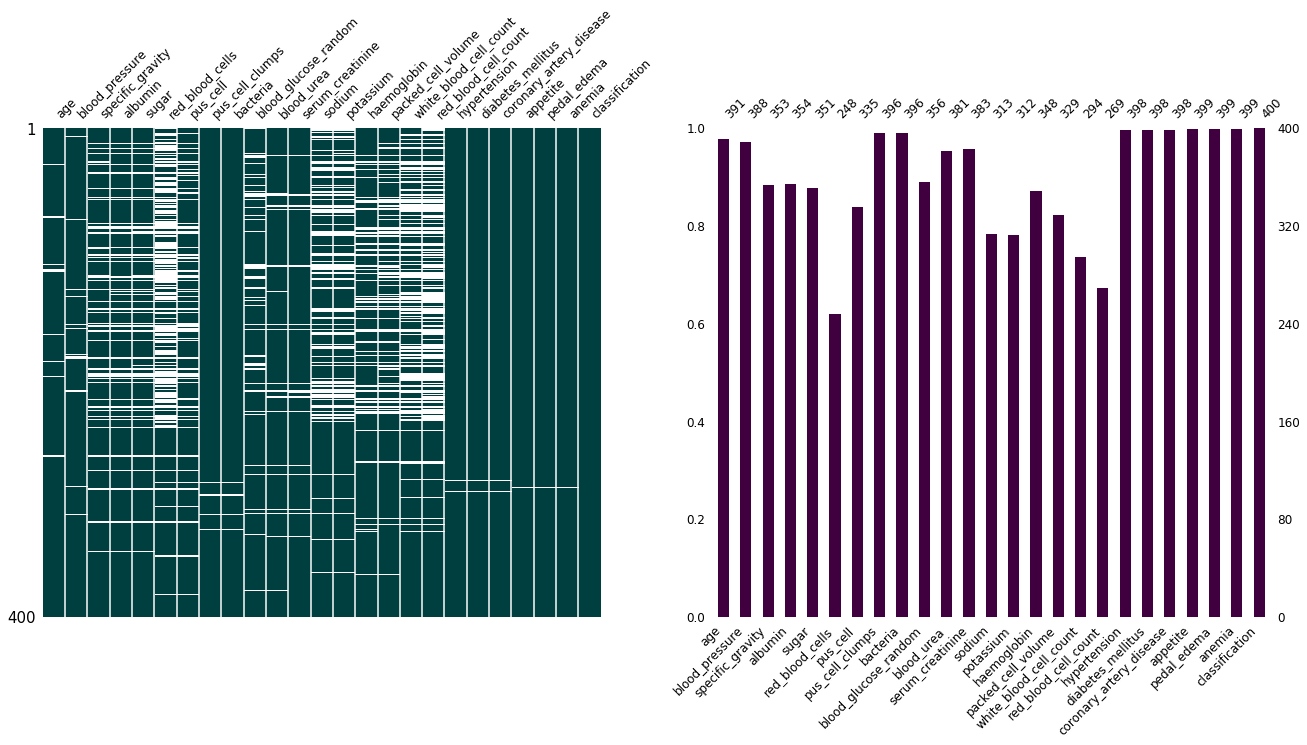

In [6]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,9))
msno.matrix(df, ax=ax1, sparkline=False, fontsize = 12, color=(0., 0.25, 0.25))
msno.bar(df, ax=ax2, fontsize = 12, color=(0.25, 0., 0.25))
plt.show()

C:\Users\sumai\Anaconda3\lib\site-packages\missingno\missingno.py:460: UserWarning: The 'inline' argument has been deprecated, and will be removed in a future version of missingno.
  "The 'inline' argument has been deprecated, and will be removed in a future version "


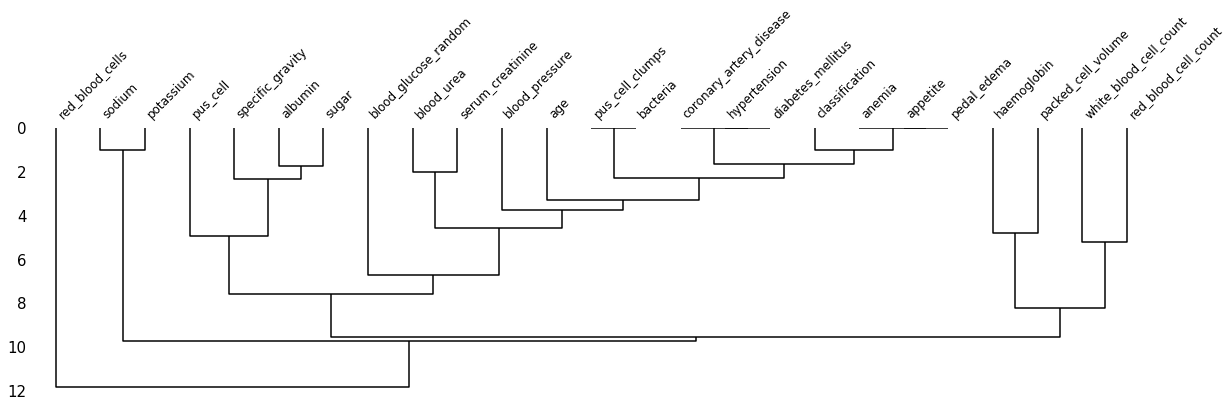

In [7]:
msno.dendrogram(df, inline=True, fontsize=12, figsize=(20, 5))

In [8]:
def dfmiss (df):

    count = df.isnull().sum()

    df_miss = pd.DataFrame(index = df.columns, data =
                     {'data_type': df.dtypes,
                      'unique_values': df.nunique(),
                      'have_null?': df.isnull().any(),
                      'how many?' : count,
                      '%' : count/df.shape[0]*100 })
    return df_miss

miss = dfmiss(df)
miss.to_csv('miss.csv')
miss.head(50)

,data_type,unique_values,have_null?,how many?,%
age,float64,76,True,9,2.25
blood_pressure,float64,10,True,12,3.00
specific_gravity,float64,5,True,47,11.75
albumin,float64,6,True,46,11.50
sugar,float64,6,True,49,12.25
red_blood_cells,float64,2,True,152,38.00
pus_cell,float64,2,True,65,16.25
pus_cell_clumps,float64,2,True,4,1.00
bacteria,float64,2,True,4,1.00
blood_glucose_random,float64,146,True,44,11.00


### Separating the Continuous and Categorical Features

In [9]:
cols = df.columns.to_list()
cat = []
cont = []

for col in cols:
    if df[col].nunique() < 10:
        cat.append(col)
    else:
        cont.append(col)     

###  Univariate Analysis

#### Categorical Features

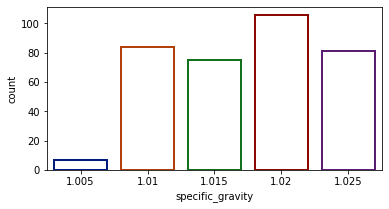

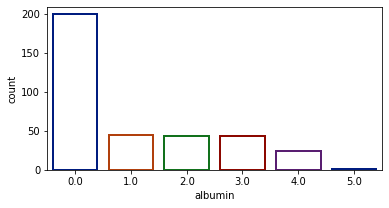

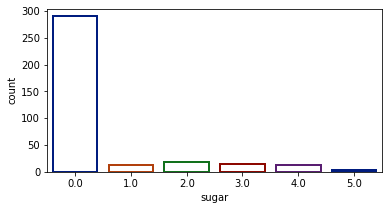

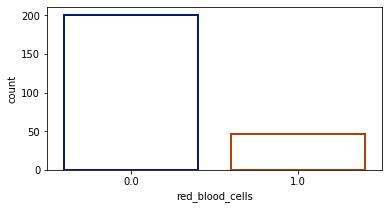

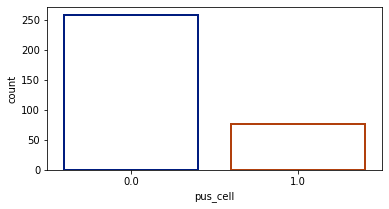

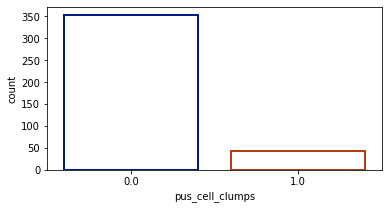

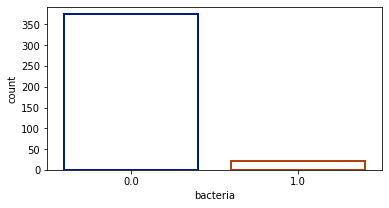

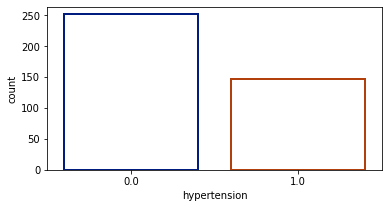

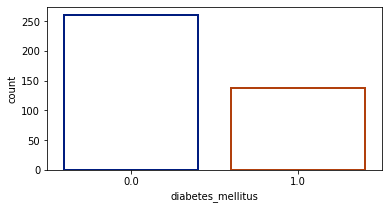

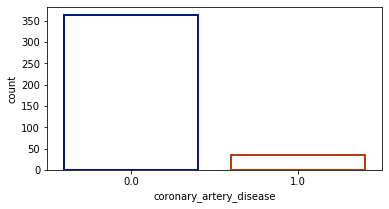

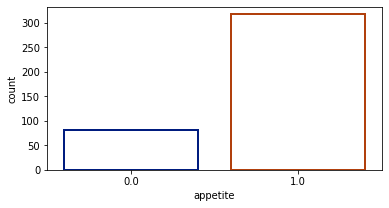

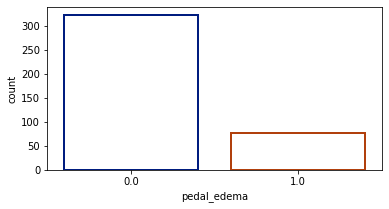

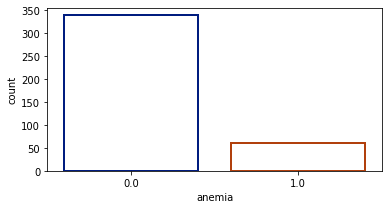

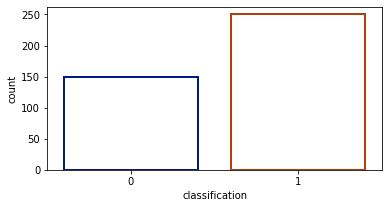

In [10]:
for col in cat:
    plt.figure(figsize=(6, 3))
    ax = sns.countplot(x=col, data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=2,
                   edgecolor=sns.color_palette("dark", 5))
    plt.show()

#### Continuous Features

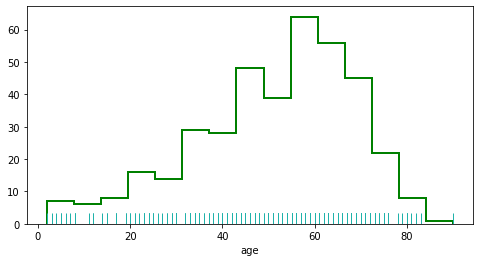

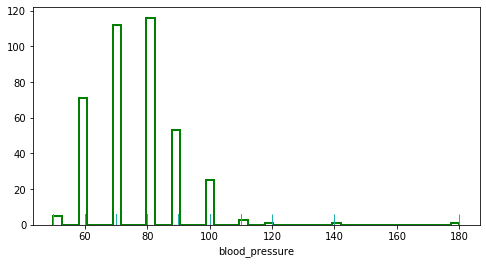

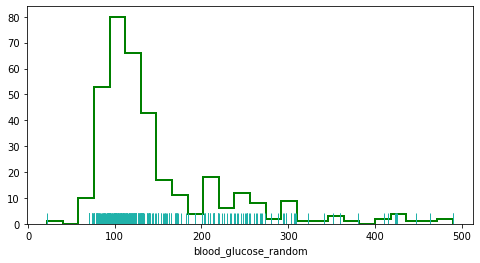

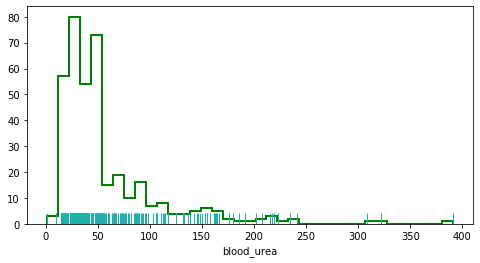

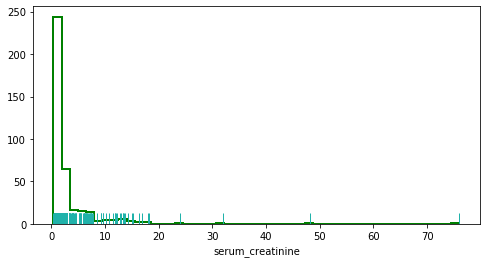

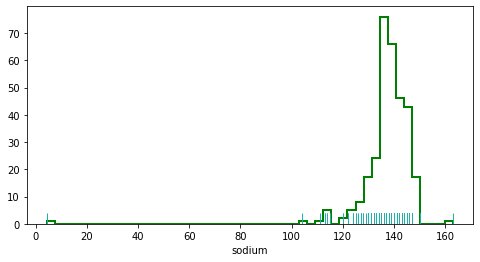

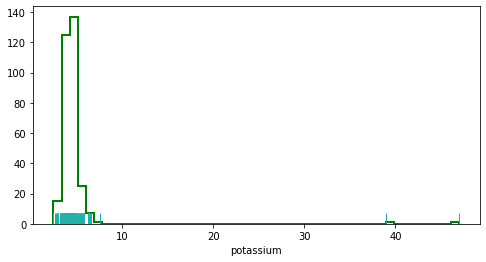

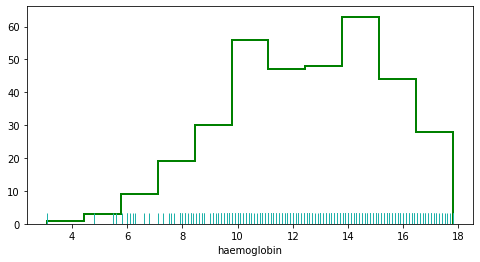

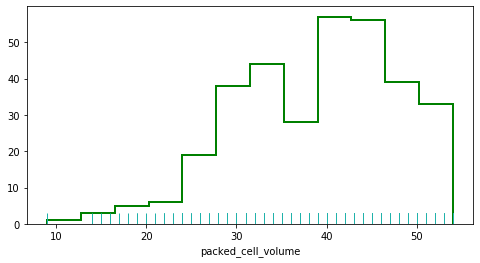

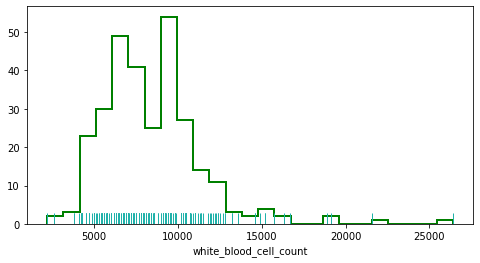

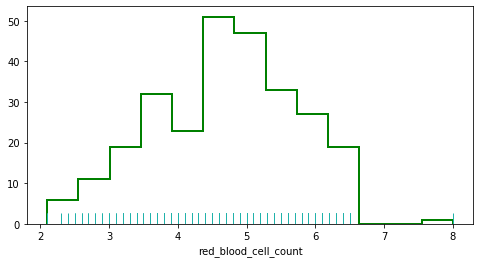

In [11]:
for col in cont:
    plt.figure(figsize=(8, 4))
    sns.distplot(df[col], kde=False, rug=True, rug_kws={"color": "lightseagreen"}, hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": 1, "color": "g"})
    plt.xlabel(col)
    plt.show()

### Bivariate Analysis

#### Categorical Features vs Target Variable (Biopsy, Schiller, Citology, Hinselmann)

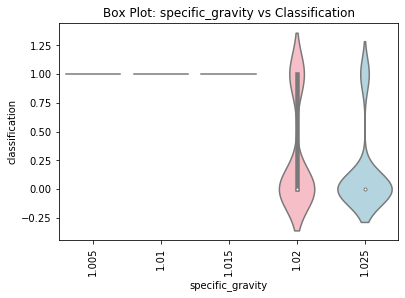

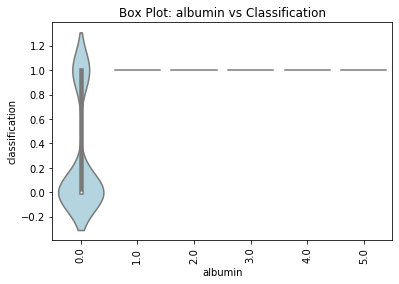

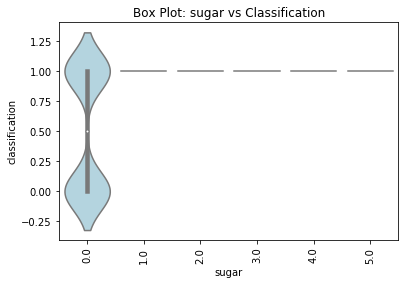

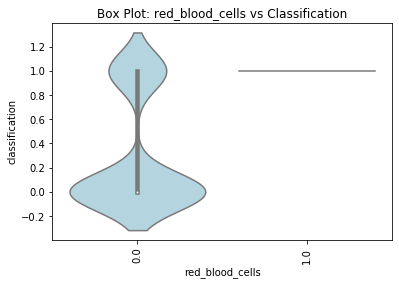

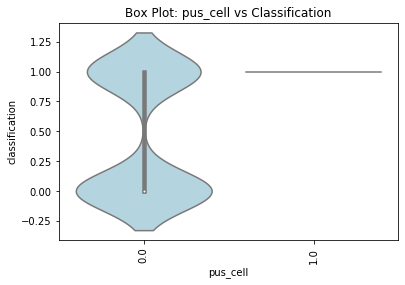

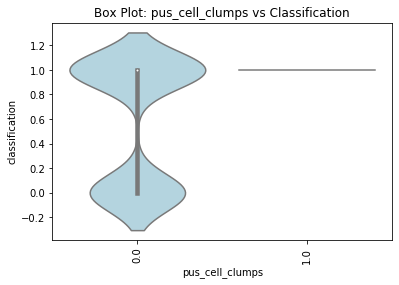

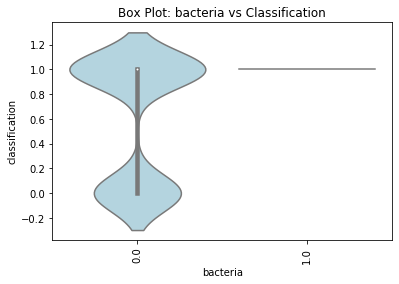

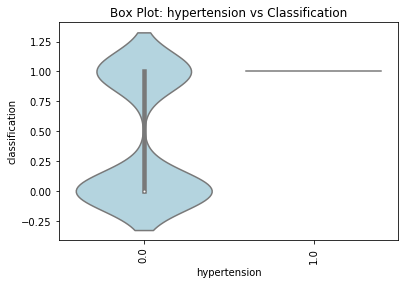

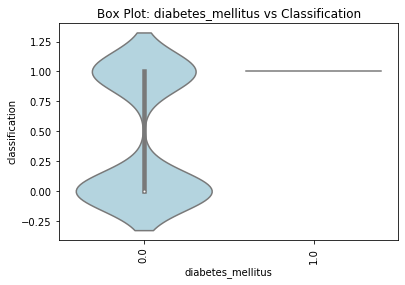

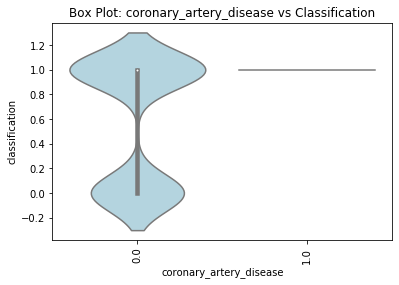

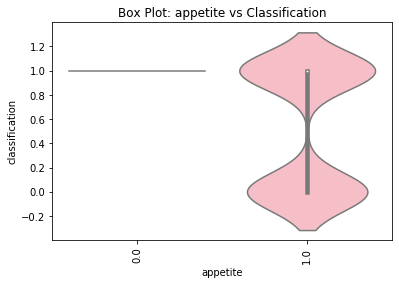

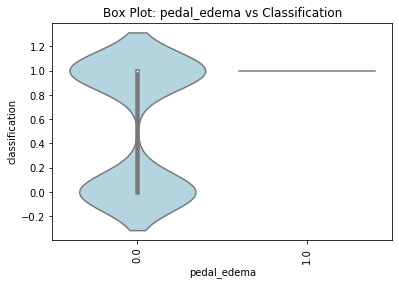

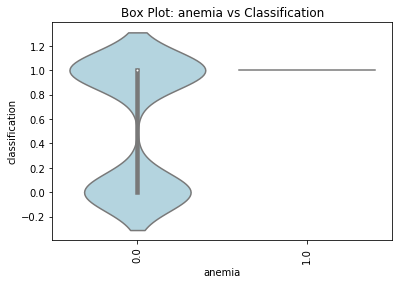

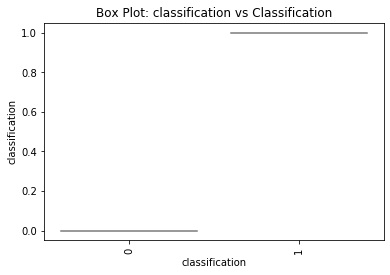

In [12]:
for col in cat:

    plt.figure(figsize=(28, 4))
    plt.subplot(1,4,1)
    ax = sns.violinplot(x=col, y=df['classification'], data=df, palette=["lightblue", "lightpink"])
    plt.xlabel(col)
    plt.xticks(rotation='vertical')
    plt.title('Box Plot: {} vs Classification'.format(col))
    plt.show()

#### Continuous Features vs Target Variable (Biopsy, Schiller, Citology, Hinselmann)

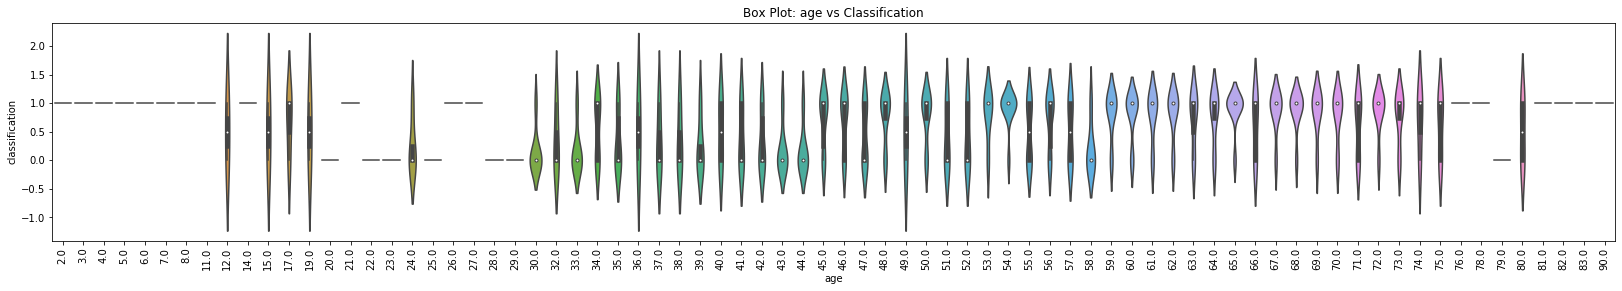

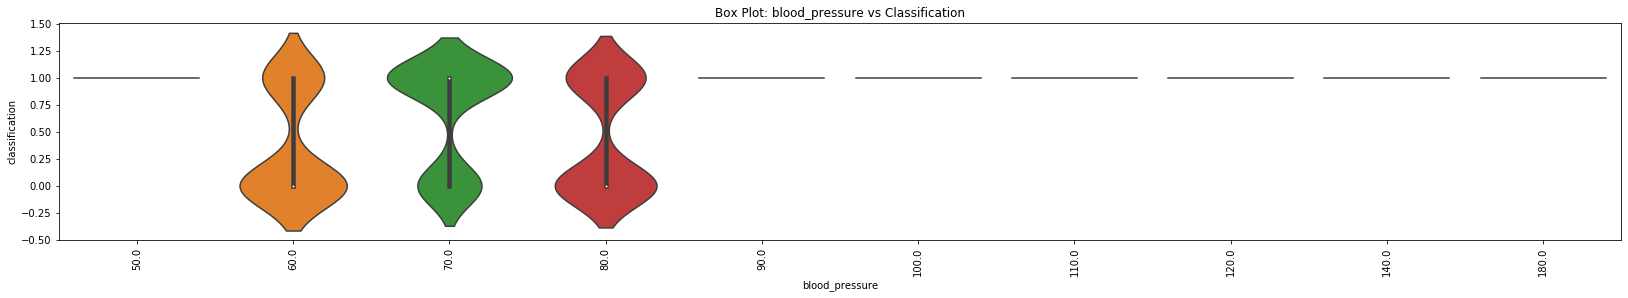

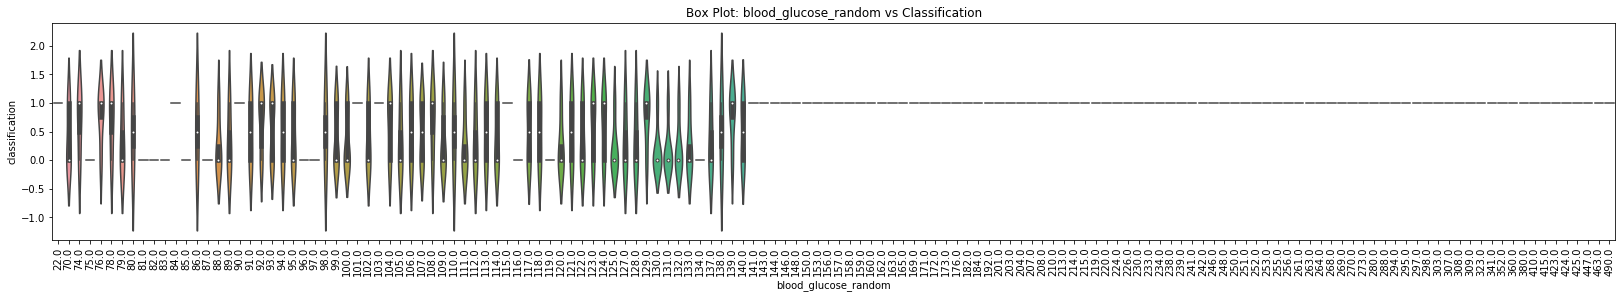

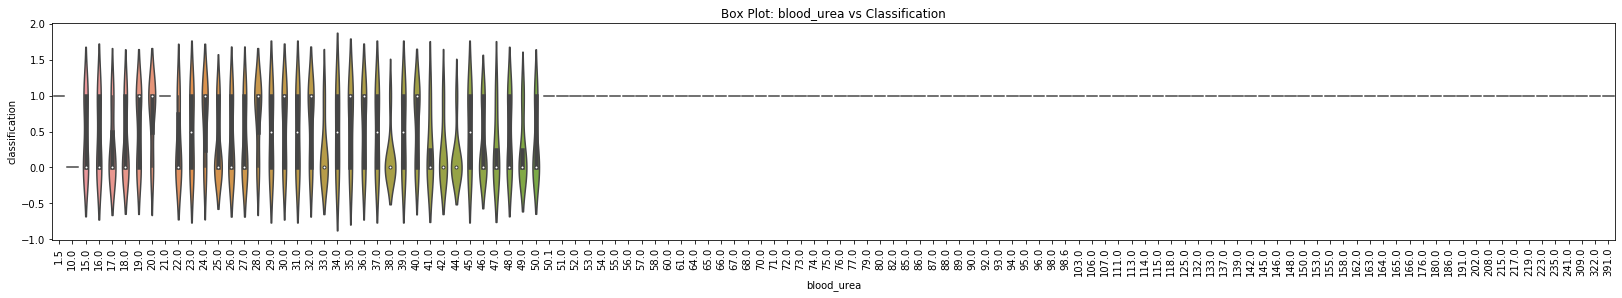

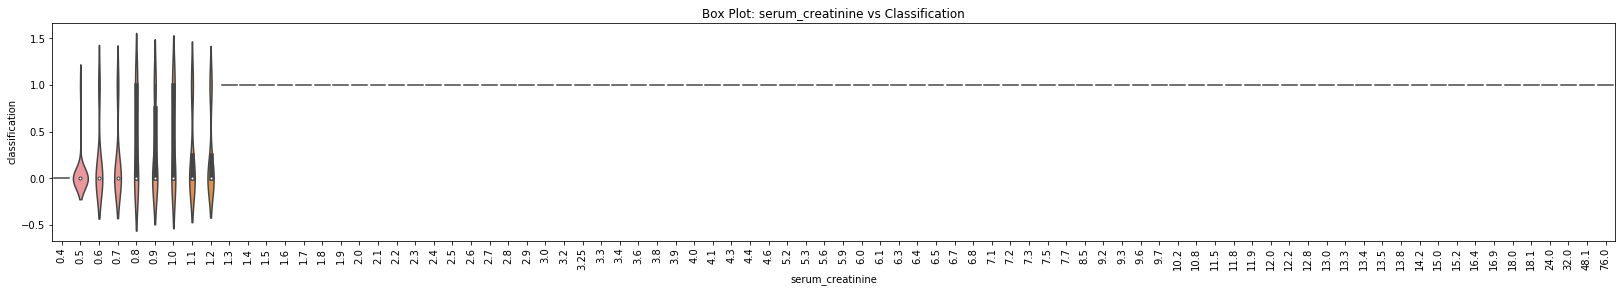

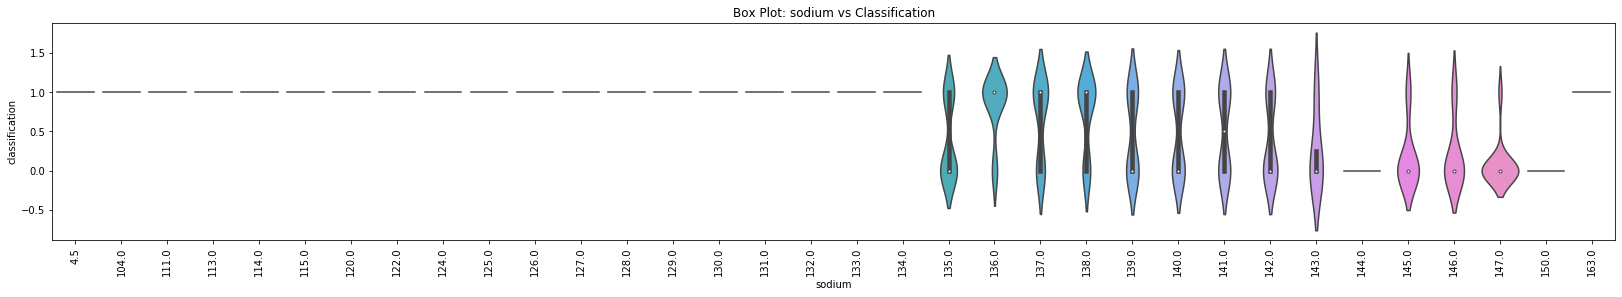

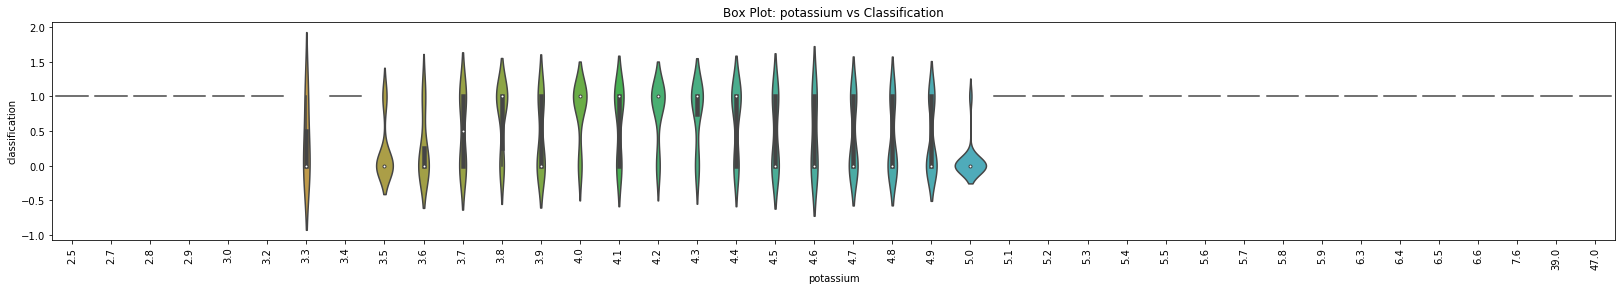

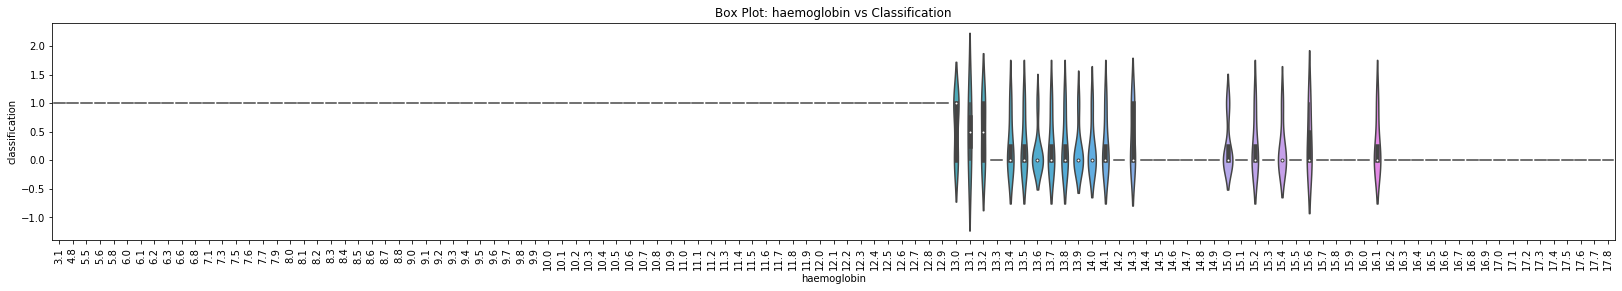

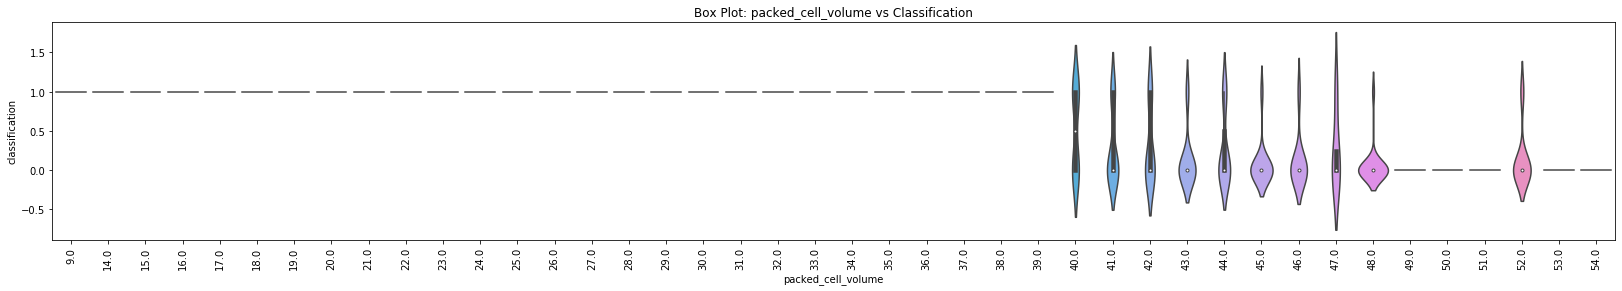

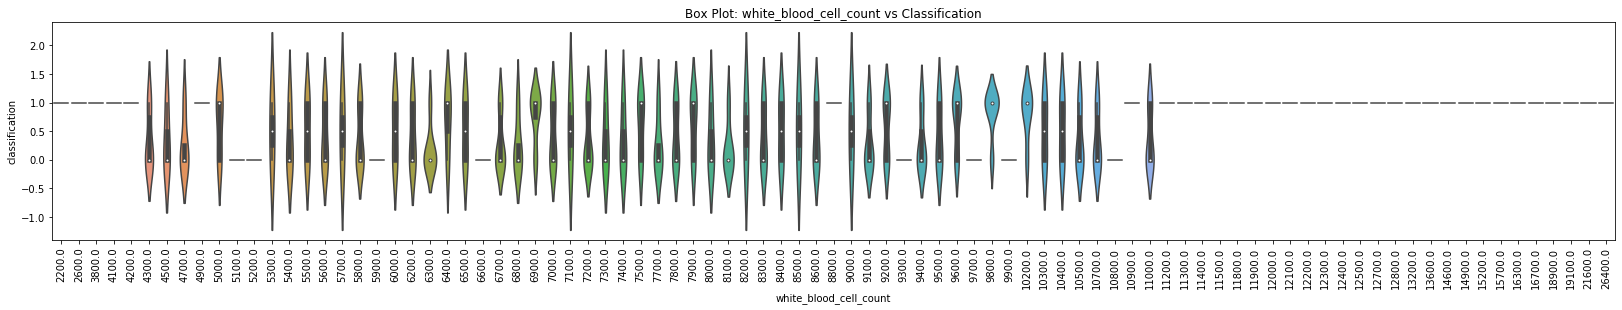

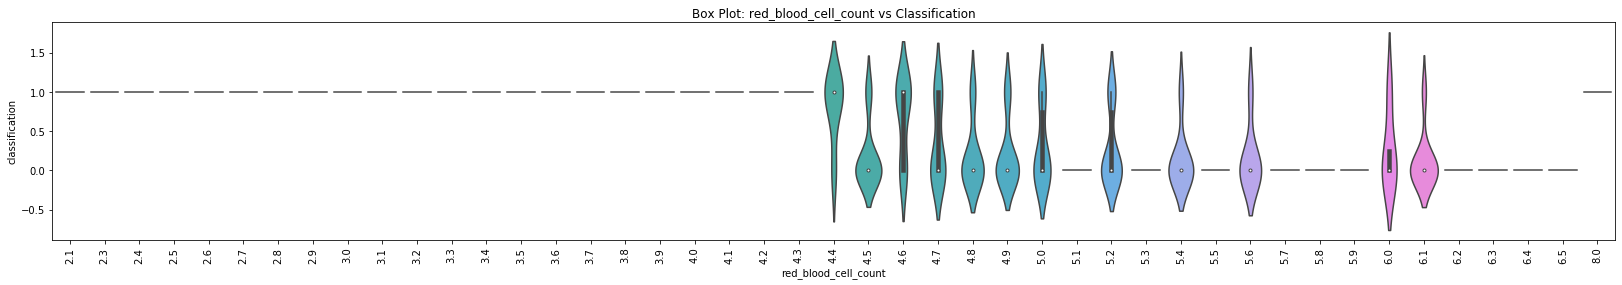

In [13]:
for col in cont:

    plt.figure(figsize=(28, 4))
    ax = sns.violinplot(x=col, y=df['classification'], data=df)
    plt.xlabel(col)
    plt.xticks(rotation='vertical')
    plt.title('Box Plot: {} vs Classification'.format(col))

    plt.show()

#### Interesting Obsevation between Continuous Features and Target Variables

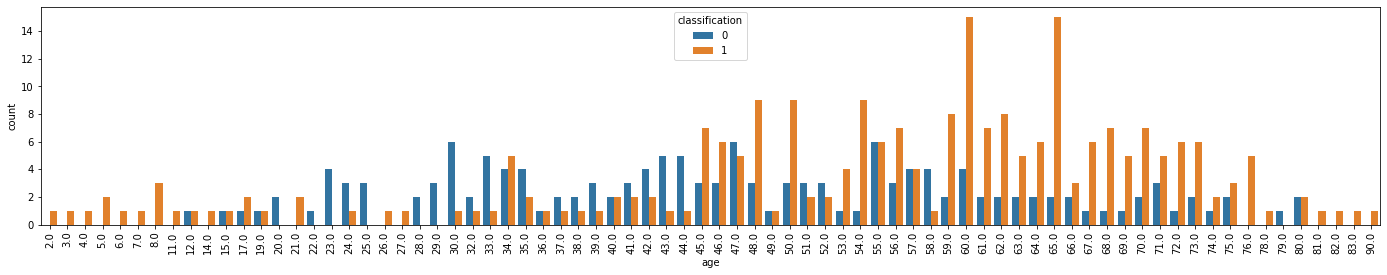

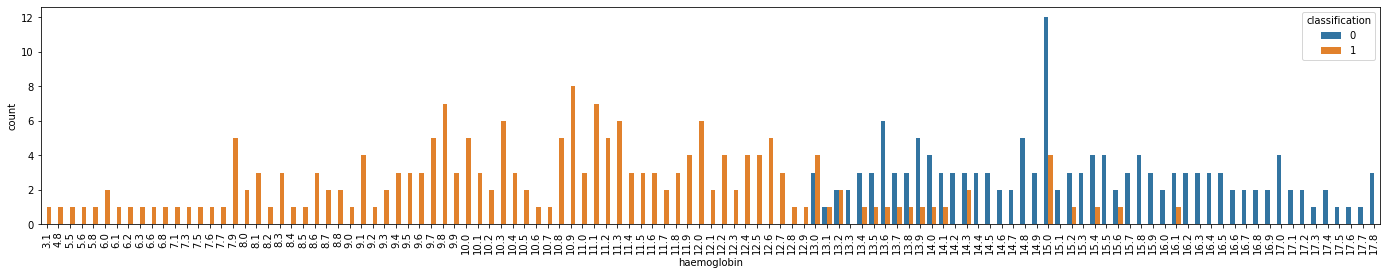

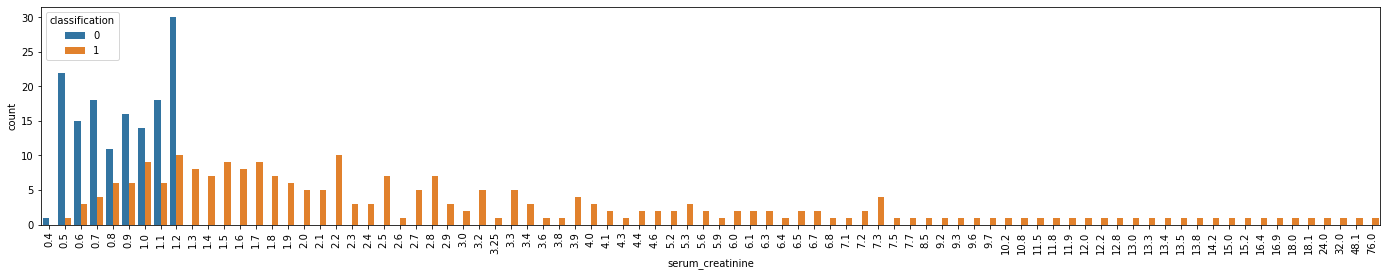

In [14]:
plt.figure(figsize=(24, 4))
sns.countplot(x="age", hue="classification", data=df)
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(24, 4))
sns.countplot(x="haemoglobin", hue="classification", data=df)
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(24, 4))
sns.countplot(x="serum_creatinine", hue="classification", data=df)
plt.xticks(rotation='vertical')
plt.show()

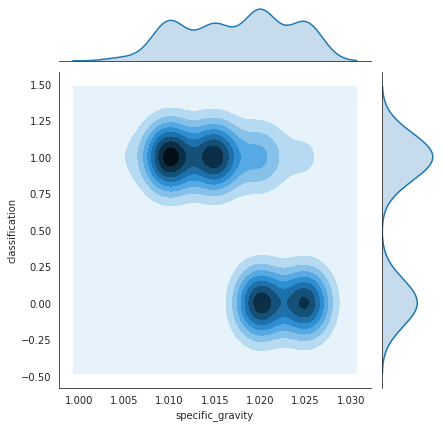

In [15]:
with sns.axes_style('white'):
    sns.jointplot("specific_gravity", "classification", df, kind='kde');

### Multivariate Analysis

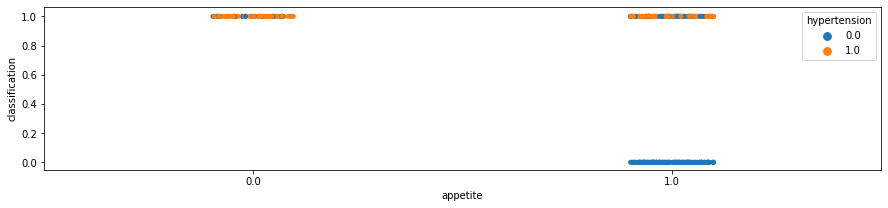

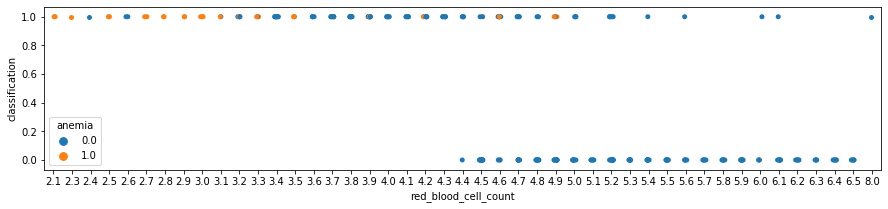

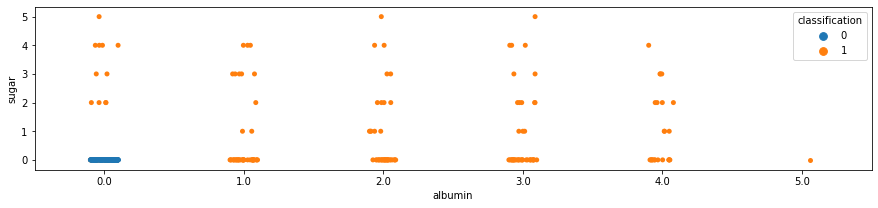

In [16]:
plt.figure(figsize=(15, 3))
ax = sns.stripplot(x="appetite", y='classification', hue="hypertension", data=df)
plt.show()

plt.figure(figsize=(15, 3))
ax = sns.stripplot(x="red_blood_cell_count", y='classification', hue="anemia", data=df)
plt.show()

plt.figure(figsize=(15, 3))
ax = sns.stripplot(x="albumin", y='sugar', hue="classification", data=df)
plt.show()

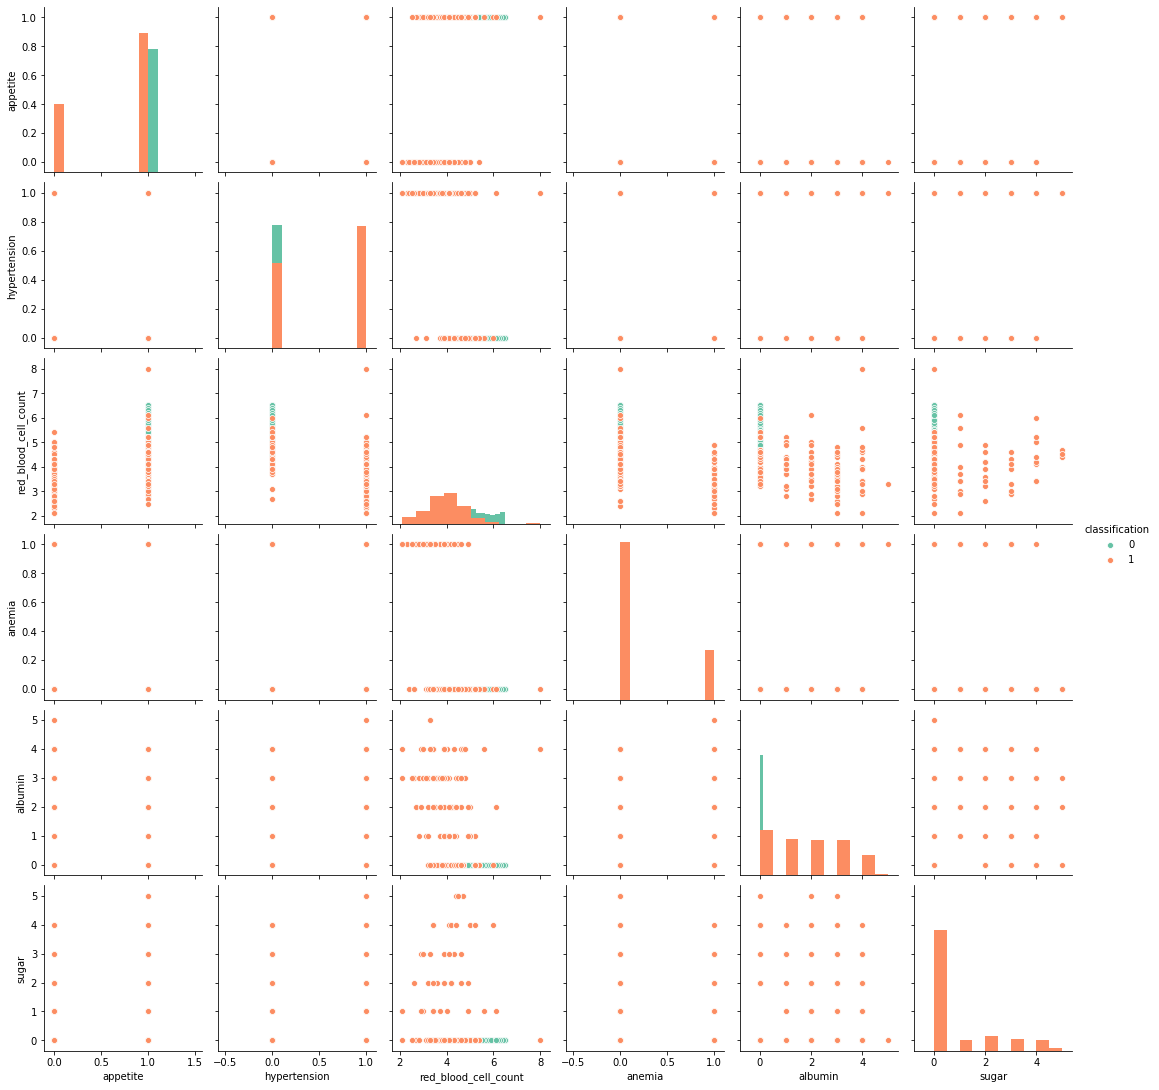

In [17]:
features = ["appetite", "hypertension", "red_blood_cell_count", "anemia", "albumin", 'sugar', "classification"]

df_pairplot = df[features]

sns.pairplot(df_pairplot, hue="classification", diag_kind="hist", corner=False, palette = 'Set2')

### Corelation between the features

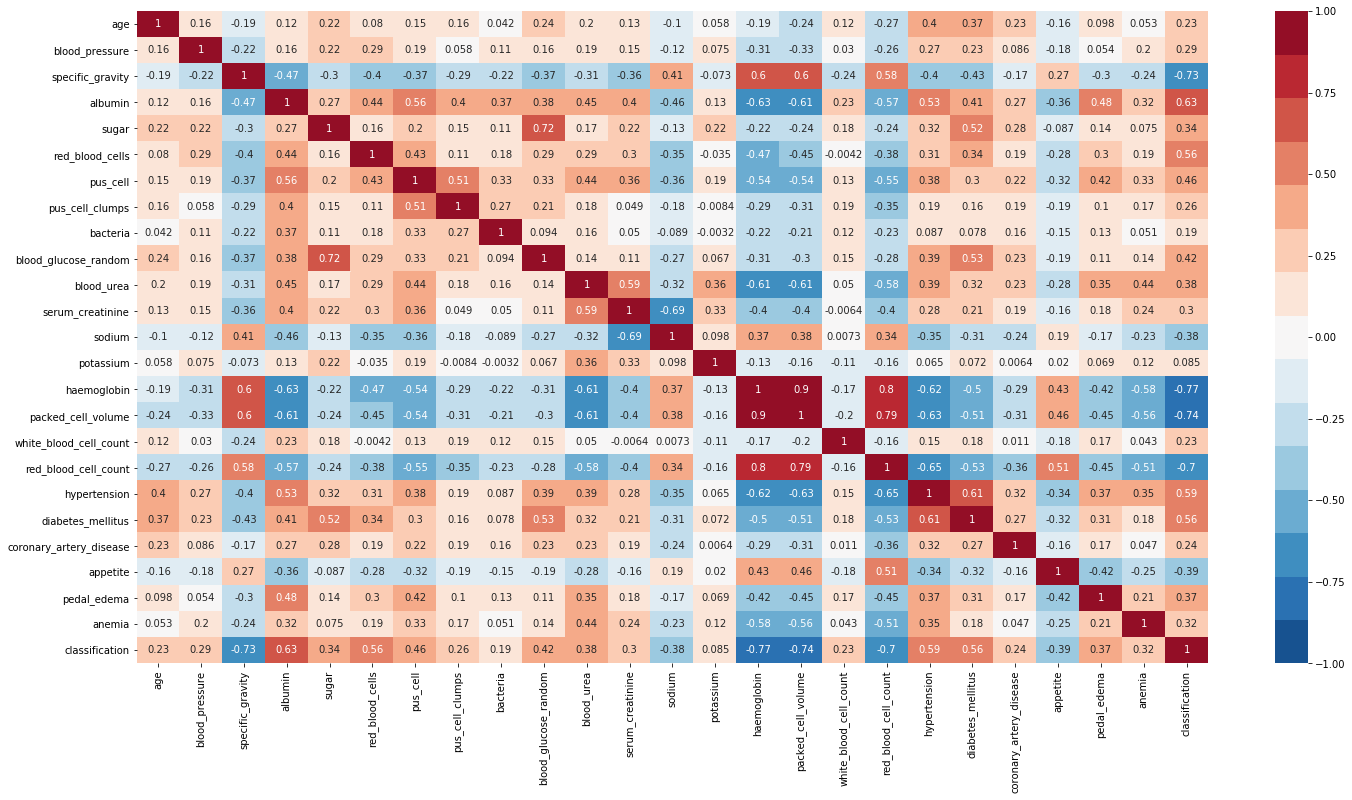

In [18]:
plt.figure(figsize=(24, 12))
sns.heatmap(df.corr(method='pearson'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

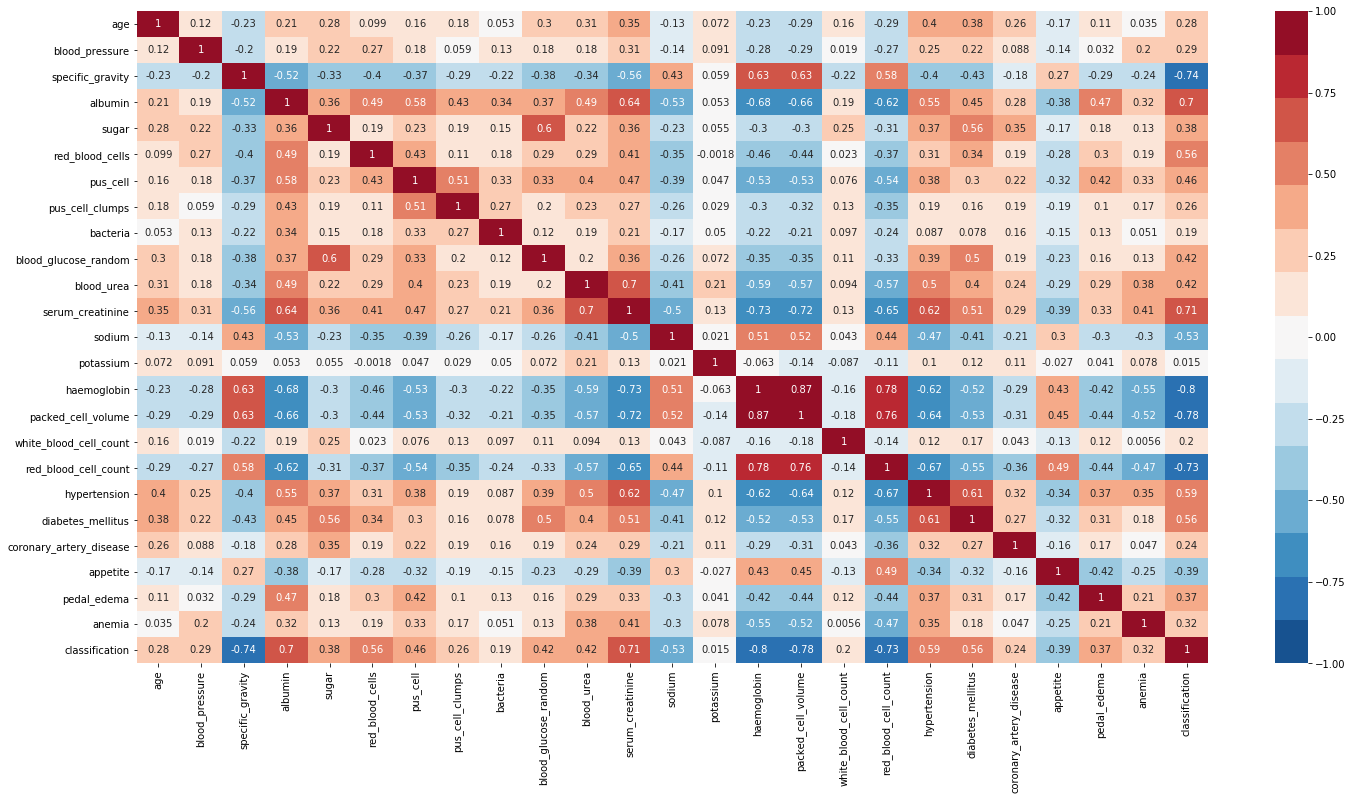

In [19]:
plt.figure(figsize=(24, 12))
sns.heatmap(df.corr(method='spearman'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

In [20]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification'],
      dtype='object')

In [21]:
df_high_cor = df[['serum_creatinine', 'albumin', 'hypertension', 'diabetes_mellitus', 'red_blood_cells', 'pus_cell', 'blood_urea', 'blood_glucose_random', 'pedal_edema', 'sugar', 'haemoglobin', 'packed_cell_volume',
       'specific_gravity', 'red_blood_cell_count', 'appetite', 'sodium', 'classification']]

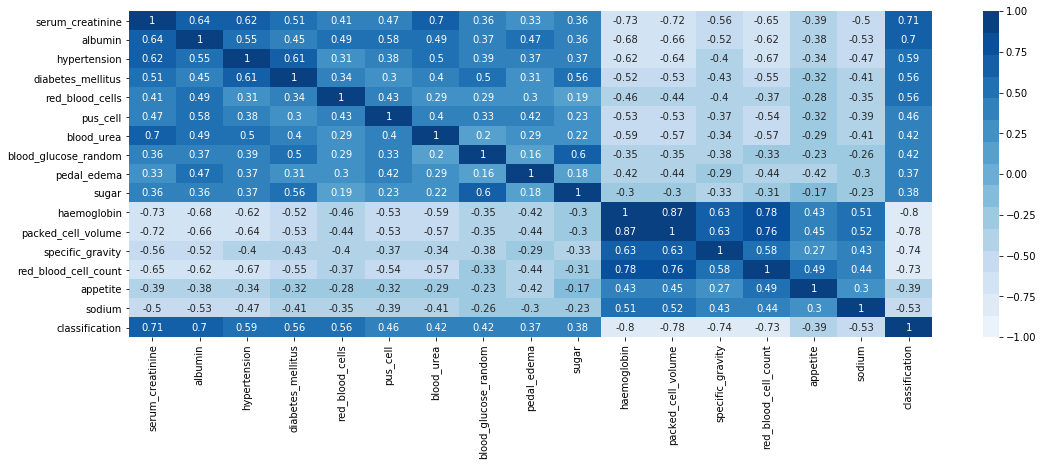

In [22]:
plt.figure(figsize=(18, 6))
sns.heatmap(df_high_cor.corr(method='spearman'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("Blues", 15))
plt.show()

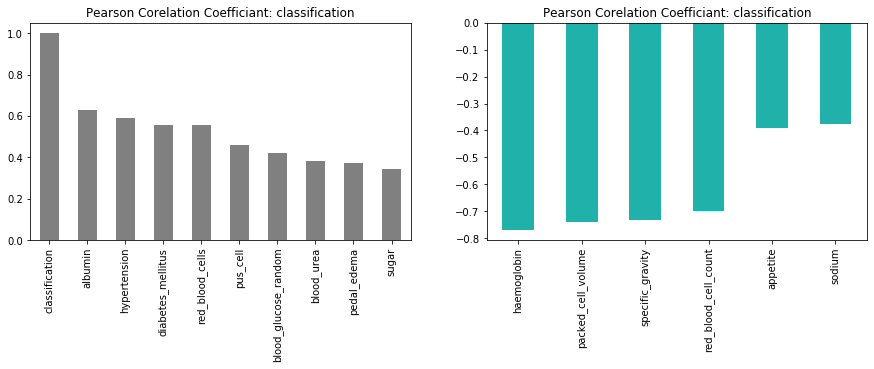

In [23]:
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
df.corr(method='pearson')['classification'].nlargest(10).plot(kind='bar', color = 'gray')
plt.title('Pearson Corelation Coefficiant: {}'.format('classification'))

plt.subplot(1,2,2)
df.corr(method='pearson')['classification'].nsmallest(6).plot(kind='bar', color = 'lightseagreen')
plt.title('Pearson Corelation Coefficiant: {}'.format('classification'))
plt.show()

In [24]:
l_p = df.corr(method='pearson')['classification'].nlargest(10)
l_p = l_p.to_frame()
s_p = df.corr(method='pearson')['classification'].nsmallest(6)
s_p = s_p.to_frame()
pearson = l_p.append(s_p)
pearson

,classification
classification,1.000000
albumin,0.627090
hypertension,0.588820
diabetes_mellitus,0.557444
red_blood_cells,0.555097
pus_cell,0.461812
blood_glucose_random,0.419672
blood_urea,0.380605
pedal_edema,0.374480
sugar,0.344070


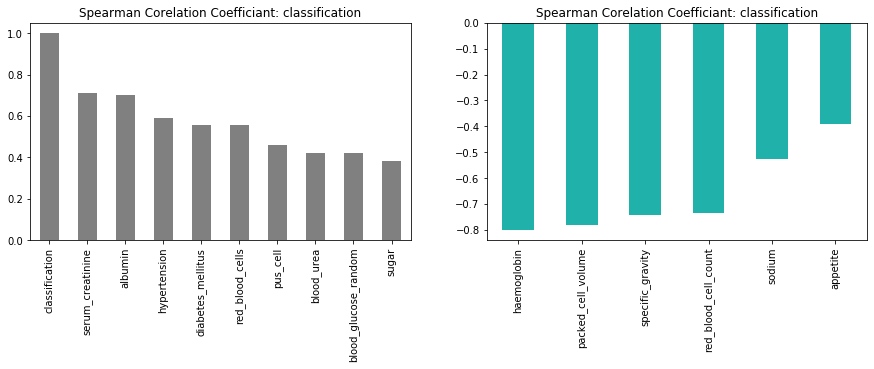

In [25]:
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
df.corr(method='spearman')['classification'].nlargest(10).plot(kind='bar', color = 'gray')
plt.title('Spearman Corelation Coefficiant: {}'.format('classification'))

plt.subplot(1,2,2)
df.corr(method='spearman')['classification'].nsmallest(6).plot(kind='bar', color = 'lightseagreen')
plt.title('Spearman Corelation Coefficiant: {}'.format('classification'))
plt.show()

In [26]:
l_s = df.corr(method='spearman')['classification'].nlargest(10)
l_s = l_s.to_frame()
s_s = df.corr(method='spearman')['classification'].nsmallest(6)
s_s = s_s.to_frame()
spearman = l_s.append(s_s)
spearman

,classification
classification,1.000000
serum_creatinine,0.711072
albumin,0.699055
hypertension,0.588820
diabetes_mellitus,0.557444
red_blood_cells,0.555097
pus_cell,0.461812
blood_urea,0.422226
blood_glucose_random,0.420451
sugar,0.382592
